In [1]:
import os
import sqlite3
import sys

sys.path.append("..")

import matplotlib.pyplot as plt
import nivapy3 as nivapy
import numpy as np
import pandas as pd
import seaborn as sn
import utils

plt.style.use("ggplot")

In [2]:
# Check duplicates
key_cols = [
    "vannmiljo_code",
    "sample_date",
    "lab",
    "depth1",
    "depth2",
    "par_unit",
]

In [3]:
# Choose dataset to process
lab = "Eurofins"
year = 2021
qtr = 4
version = 1

In [4]:
v1_df = utils.read_data_template(
    f"../../data/{lab.lower()}_data_{year}_q{qtr}_v{version}.xlsx",
    sheet_name="results",
    lab=lab,
)
v1_df.drop_duplicates(subset=key_cols, keep=False, inplace=True)


The following location IDs have inconsistent names within this template:

The following location names have multiple IDs within this template:


In [5]:
version = 2

In [6]:
v2_df = utils.read_data_template(
    f"../../data/{lab.lower()}_data_{year}_q{qtr}_v{version}.xlsx",
    sheet_name="results",
    lab=lab,
)
v2_df.drop_duplicates(subset=key_cols, keep=False, inplace=True)


The following location IDs have inconsistent names within this template:

The following location names have multiple IDs within this template:


In [7]:
v1_df.head()

,vannmiljo_code,sample_date,lab,depth1,depth2,par_unit,flag,value
0,027-79278,2021-10-05 07:10:00,Eurofins,0.0,0.0,TEMP_°C,nan,11.0
1,027-79278,2021-11-02 07:05:44,Eurofins,0.0,0.0,TEMP_°C,nan,8.0
2,027-79278,2021-12-07 07:10:12,Eurofins,0.0,0.0,TEMP_°C,nan,0.0
3,019-58793,2021-11-02 07:05:37,Eurofins,0.0,0.0,TEMP_°C,nan,10.0
4,021-45780,2021-12-15 07:15:50,Eurofins,0.0,0.0,TEMP_°C,nan,0.5


In [8]:
for df in (v1_df, v2_df):
    df.drop(["lab", "depth1", "depth2", "flag"], inplace=True, axis="columns")

In [9]:
df = pd.merge(
    v1_df,
    v2_df,
    on=["vannmiljo_code", "sample_date", "par_unit"],
    how="inner",
    suffixes=["_v1", "_v2"],
)
df.head()

,vannmiljo_code,sample_date,par_unit,value_v1,value_v2
0,027-79278,2021-10-05 07:10:00,TEMP_°C,11.0,11.0
1,027-79278,2021-11-02 07:05:44,TEMP_°C,8.0,8.0
2,027-79278,2021-12-07 07:10:12,TEMP_°C,0.0,0.0
3,019-58793,2021-11-02 07:05:37,TEMP_°C,10.0,10.0
4,021-45780,2021-12-15 07:15:50,TEMP_°C,0.5,0.5


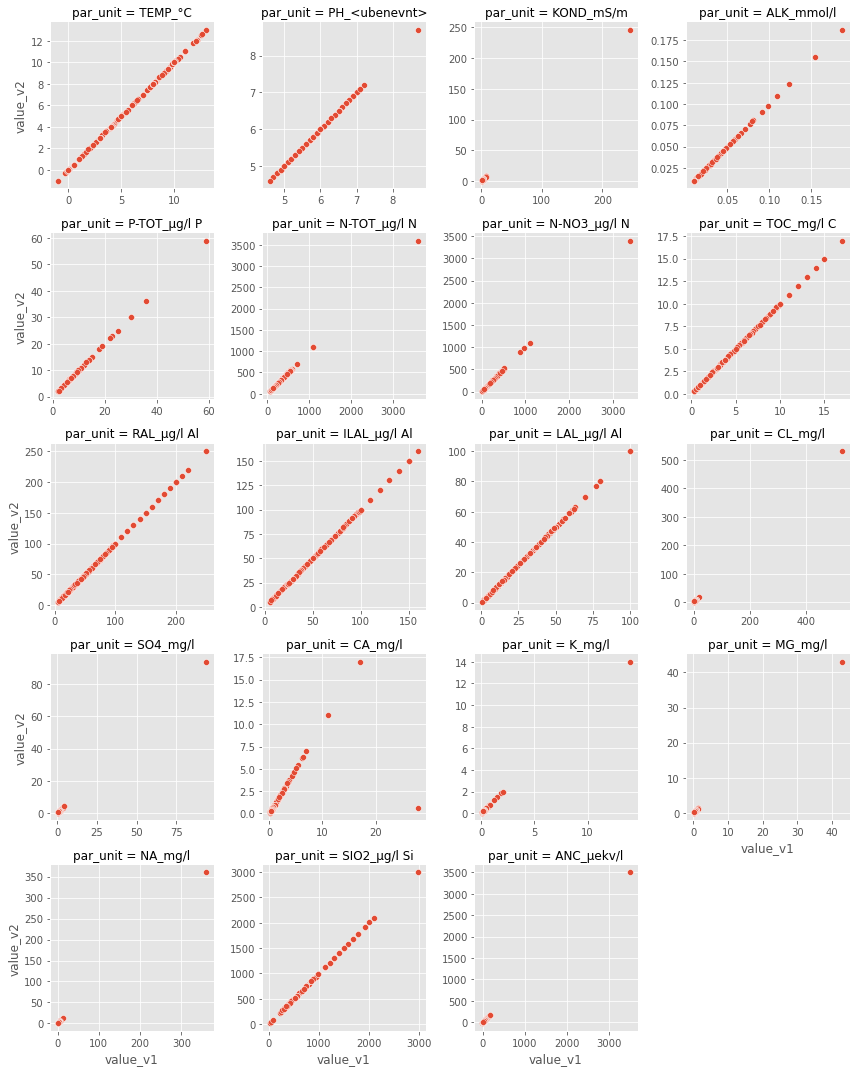

In [12]:
sn.relplot(
    data=df,
    x="value_v1",
    y="value_v2",
    col="par_unit",
    col_wrap=4,
    kind="scatter",
    height=3,
    facet_kws={"sharey": False, "sharex": False},
)